In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Enable inline plotting
%matplotlib inline

In [3]:
#load the dataset
df=pd.read_csv('salary_prediction_dataset.csv')

df.head()

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082


YearsExperience    0
Salary             0
dtype: int64


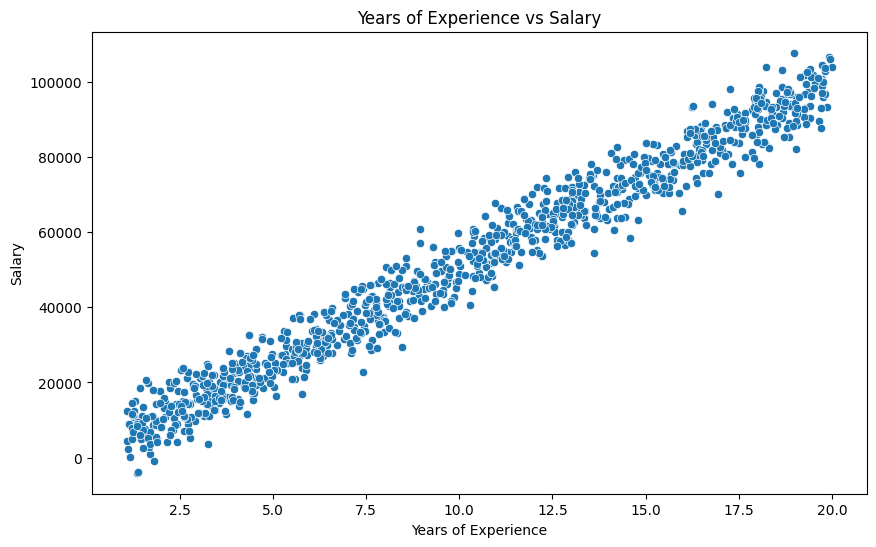

In [4]:
#checking missing values
print(df.isnull().sum())

#plot distribution
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
#splitting the dataset into features (X) and target variable(y)
X=df[['YearsExperience']] #Independent variable
y=df['Salary'] #Dependent Variable

#splitting into training (80%) and testing(20%) sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

#checking dataset split sizes
X_train.shape, X_test.shape

((800, 1), (200, 1))

In [6]:
#Creating and training the simple linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

# Display model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 995.5770464802481
Coefficient: 4953.709417260945


In [7]:
#Predicting salary for test data
y_pred=model.predict(X_test)

# Creating a DataFrame to compare actual vs predicted values
results=pd.DataFrame({'Actual':y_test,'Predicted Salary':y_pred})
results.head()

,Actual,Predicted Salary
521,46144.843128,41798.916309
737,85731.005173,82808.016799
740,55059.748116,49496.929481
660,42143.595304,39465.280850
411,88585.759395,95369.573814


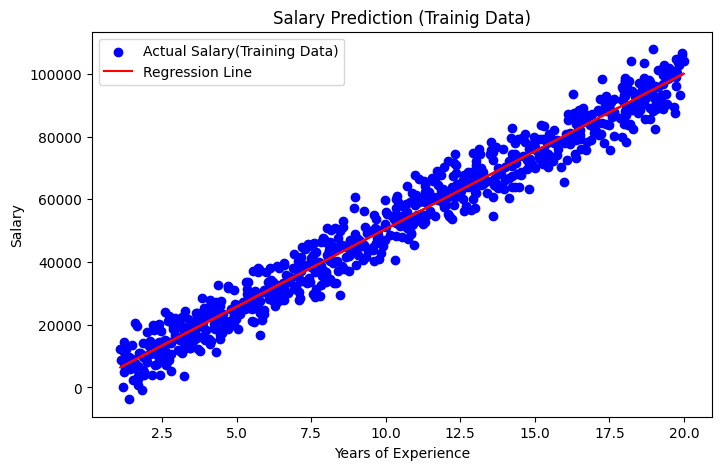

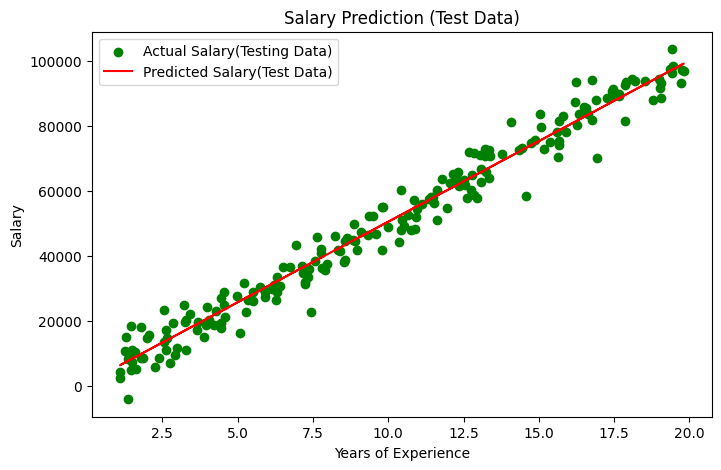

In [9]:
#Plot training data with regression line
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train,color='blue',label="Actual Salary(Training Data)")
plt.plot(X_train,model.predict(X_train),color='red',label="Regression Line")
plt.title('Salary Prediction (Trainig Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

#plot test data prediction
plt.figure(figsize=(8,5))
plt.scatter(X_test,y_test,color='green',label="Actual Salary(Testing Data)")
plt.plot(X_test,y_pred,color='red',label="Predicted Salary(Test Data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction (Test Data)")
plt.legend()
plt.show()

In [10]:
#Model Evaluation
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3602.3955438952066
Mean Squared Error: 21434311.66454385
R-squared: 0.9720753738957405


In [11]:
#Predicrt Salary Based on user input
experience=float(input("Enter Years of Experience:"))
predicted_salary=model.predict([[experience]])[0]
print(f"Predicted Salary for {experience} years of experience: ${predicted_salary:.2f}")


Enter Years of Experience:15
Predicted Salary for 15.0 years of experience: $75301.22


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: Write a conclusion for this linear regression model. How this model can help HR professional

This linear regression model demonstrates a strong correlation between years of experience and salary, as indicated by the R-squared value.  While further analysis with more features could potentially improve accuracy, this model provides HR professionals with a valuable tool for:

1. **Salary Benchmarking:**  Quickly estimate competitive salary ranges for new hires or existing employees based on their years of experience. This helps ensure fair compensation and attract top talent.

2. **Compensation Planning:**  Forecast potential salary growth for employees over time, informing promotion decisions and performance-based compensation adjustments.  This enables strategic workforce planning.

3. **Budgeting and Resource Allocation:**  Predict overall salary costs based on projected workforce size and experience levels. This improves budgeting accuracy and resource allocation.

4. **Identifying Salary Discrepancies:**  Compare predicted salaries against current salaries to pinpoint potential inequities or outliers within the organization. This aids in rectifying any unfair compensation practices.

However, it is crucial to remember that this model is based solely on years of experience.  Other factors like job title, location, skills, performance, and education level significantly impact salary and are not accounted for in this basic model.  HR professionals should use this model as a starting point and incorporate additional qualitative and quantitative data for a more comprehensive salary assessment.
